In [163]:
# Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import dateutil.parser as dp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Global variables
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

### Ethereum Headlines from Google NewsApi
------------------------------------------------

In [164]:
news = pd.read_csv('textdata/news-ethereum5.csv', delimiter=',')

# Show news dataframe
print 'Number of entries: ', news.shape[0]
print 'Number of features: ', news.shape[1] - 1
news.head(1)

Number of entries:  6167
Number of features:  6


,description,author,url,title,publishedAt,source,urlToImage
0,The UK government wants to increase regulation...,Nick Summers,https://www.engadget.com/2017/12/04/uk-treasur...,UK plans crackdown on criminals using Bitcoin ...,2017-12-04T16:45:00Z,"{u'id': u'engadget', u'name': u'Engadget'}",https://o.aolcdn.com/images/dims?thumbnail=120...


In [165]:
# Function to plot histograms
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 7.5), squeeze=False)
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed=1, color=BNB_RED, alpha=0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Date")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
def parse(s):
    if s != 'publishedAt':
        return int(dp.parse(s).strftime('%s'))
    else:
        return 1512508462 # Should only be 1 of these, null anyway

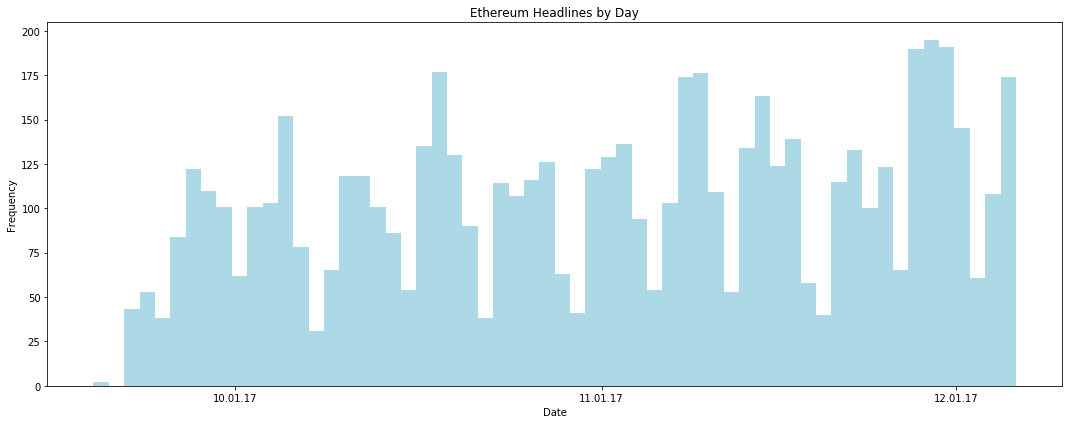

In [166]:
# Ethereum News Headlines by Day histogram
times = news['publishedAt'].apply(lambda x: mdates.epoch2num(parse(x)))
fix, ax = plt.subplots(1,1, figsize = (15,6))
ax.hist(times, bins=60, color='lightblue')
locator = mdates.AutoDateLocator()
ax.set_title('Ethereum Headlines by Day')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d.%y'))
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")

plt.savefig('media/news-hist.png', transparent=True)
plt.tight_layout()
plt.show()

### Ethereum Headlines from Reddit
------------------------------------------------

In [167]:
reddit = pd.read_csv('textdata/reddit-ethereum.csv', delimiter=',')

# Show reddit dataframe
print 'Number of entries: ', reddit.shape[0]
print 'Number of features: ', reddit.shape[1] - 1
reddit.head(1)

Number of entries:  1235
Number of features:  12


,view_count,domain,score,title,num_comments,created,created_utc,media_embed,permalink,selftext,likes,author,name
0,None,i.redd.it,118.0,Let's all hard fork the kitties!,16.0,1.512432e+09,1511630636,{},/r/ethereum/comments/7hi5ua/lets_all_hard_fork...,NaN,None,frikandidlo,t3_7hi5ua


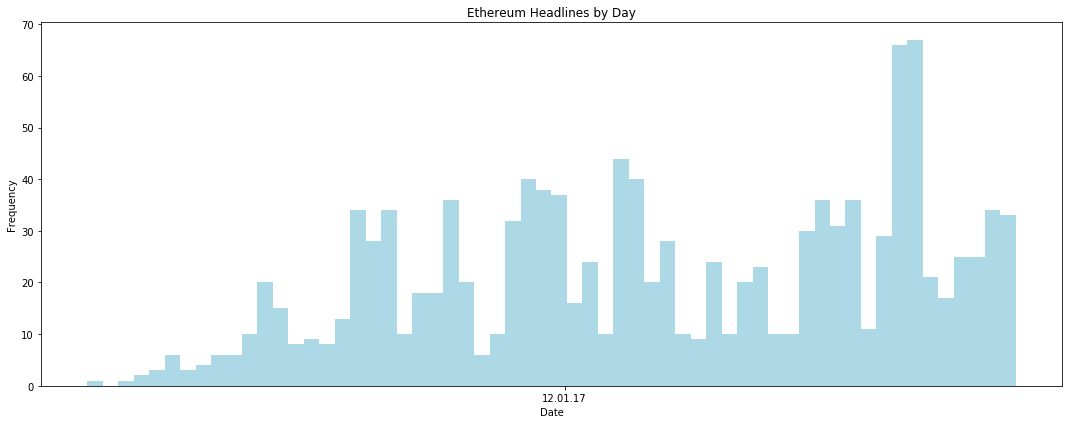

In [168]:
# Ethereum News Headlines by Day histogram
reddit_times = reddit['created_utc'].apply(lambda x: mdates.epoch2num(x))
fig, ax = plt.subplots(1,1, figsize = (15,6))
# ax.hist(times, bins=60, color='pink')
ax.hist(sorted(reddit_times), bins=60, color='lightblue')
locator = mdates.AutoDateLocator()
ax.set_title('Ethereum Headlines by Day')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%d.%y'))
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
plt.savefig('media/reddit-hist.png', transparent=True)
plt.tight_layout()
plt.show()